# Deep learning entry task
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Diaz](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

## 1. Import all necessary packages

In [1]:
#import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Reshape
from keras.optimizers import Adam
from PIL import Image
#import tensorflow_addons as tfa

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load the Fashion MNIST dataset for image classification
Create three disjoint sets: train, validation and test.

In [3]:
#Load dataset with keras
(x_train_dataset, y_train_dataset), (x_test_dataset, y_test_dataset) = keras.datasets.fashion_mnist.load_data()

#Change to load with pandas to use drop function
x_train_dataset = x_train_dataset.reshape(-1, 784)
x_test_dataset = x_test_dataset.reshape(-1, 784)

train_df = pd.DataFrame(x_train_dataset, columns=[f"pixel_{i}" for i in range(784)])
train_df["label"] = pd.DataFrame(y_train_dataset)

test_df = pd.DataFrame(x_test_dataset, columns=[f"pixel_{i}" for i in range(784)])
test_df["label"] = pd.DataFrame(y_test_dataset)

#Keep just the data we need for our model
x_train_full = train_df.drop(["label"], axis = 1)
y_train_full = pd.DataFrame(train_df["label"])
x_test = test_df.drop(["label"], axis = 1)
y_test = pd.DataFrame(test_df["label"])

#Normalize pixel values to between 0 and 1
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

#Split the full training dataset into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.25, shuffle = True)

#One-Hot encoder 
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#Name the classes from the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
x_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
15370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
32987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,...,0.0,0.011765,0.0,0.0,0.733333,0.556863,0.631373,0.247059,0.0,0.0
40253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
31483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
49115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


## 3. Create a Multi Layer Perceptron (MLP) for image classification.
Feel free to use any configuration and framework for its implementation (Keras, Tensorflow, Pytorch, etc.)

In [5]:
#FFNN
model = Sequential()

#We add an input and two hidden layers to our model
#model.add(Reshape((28,28,1), input_shape=(28*28,)))
model.add(Dense(128, input_shape = (28*28,)))
model.add(Dense(250, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 250)               32250     
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                                 
Total params: 135,240
Trainable params: 135,240
Non-trainable params: 0
_________________________________________________________________


## 4. Train the model
During training, perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [7]:
from keras.utils import to_categorical
model.compile(loss ='categorical_crossentropy',
optimizer = Adam(lr=0.001, decay=1e-5),
metrics = ['accuracy'],)

history = model.fit(x_train, y_train, epochs = 7, 
batch_size=100,
validation_split=0.001, validation_data=(x_val, y_val))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/7
450/450 [==============================] - 12s 23ms/step - loss: 0.5444 - accuracy: 0.8076 - val_loss: 0.4484 - val_accuracy: 0.8421
Epoch 2/7
450/450 [==============================] - 10s 21ms/step - loss: 0.3995 - accuracy: 0.8552 - val_loss: 0.3722 - val_accuracy: 0.8640
Epoch 3/7
450/450 [==============================] - 6s 14ms/step - loss: 0.3574 - accuracy: 0.8679 - val_loss: 0.3580 - val_accuracy: 0.8681
Epoch 4/7
450/450 [==============================] - 7s 16ms/step - loss: 0.3304 - accuracy: 0.8778 - val_loss: 0.3348 - val_accuracy: 0.8795
Epoch 5/7
450/450 [==============================] - 3s 7ms/step - loss: 0.3128 - accuracy: 0.8839 - val_loss: 0.3461 - val_accuracy: 0.8733
Epoch 6/7
450/450 [==============================] - 4s 8ms/step - loss: 0.2990 - accuracy: 0.8884 - val_loss: 0.3378 - val_accuracy: 0.8799
Epoch 7/7
450/450 [==============================] - 5s 12ms/step - loss: 0.2847 - accuracy: 0.8939 - val_loss: 0.3392 - val_accuracy: 0.8783


## 5. Plots
Plot the evolution of the Loss function and Accuracy values over the epochs during training.

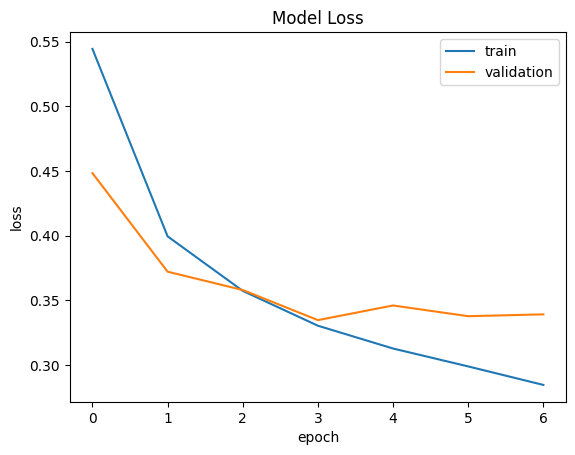

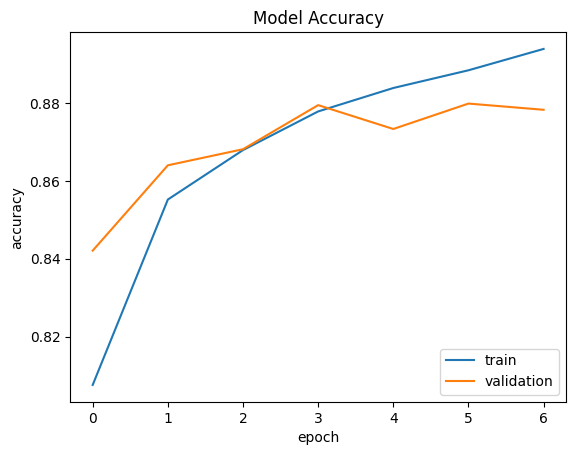

In [8]:
#Plotting evolution of Loss function over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper right')
plt.show()

#Plotting evolution of Accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='lower right')
plt.show()

## 6. Run inference
Run inference in the test set and compute the metrics for testing.

In [9]:
loss,accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss:{loss}')
print(f'Test Accuracy:{accuracy}')

#Generate prediction for three samples
y_pred = model.predict(x_test[:3])
y_pred_class = np.argmax(y_pred, axis = 1)
for i in range(0,3):
  pred_class = class_names[y_pred_class[i]]
  print("Predictions' class #" + str(i) + ": ", pred_class)
  index = np.where(y_test[i] == 1.)[0][0]
  ref_class_name = class_names[index]
  print("References' class #" + str(i) + ": ", ref_class_name)  

313/313 [==============================] - 2s 4ms/step - loss: 0.3707 - accuracy: 0.8682
Test Loss:0.37069860100746155
Test Accuracy:0.8682000041007996
1/1 [==============================] - 0s 167ms/step
Predictions' class #0:  Ankle boot
References' class #0:  Ankle boot
Predictions' class #1:  Pullover
References' class #1:  Pullover
Predictions' class #2:  Trouser
References' class #2:  Trouser


## 7. Test samples
Show some samples from the test set: image, reference class and predicted class.

1/1 [==============================] - 0s 42ms/step


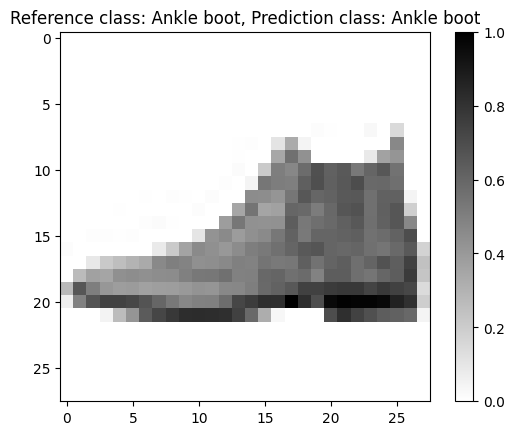

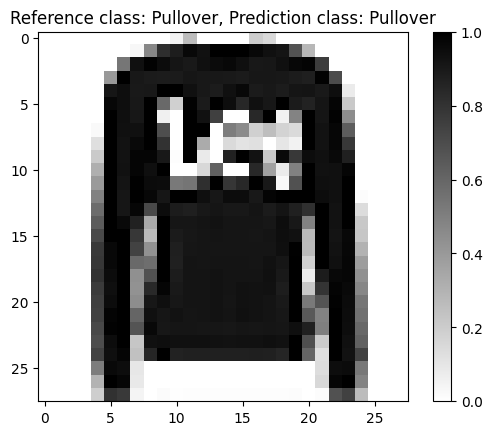

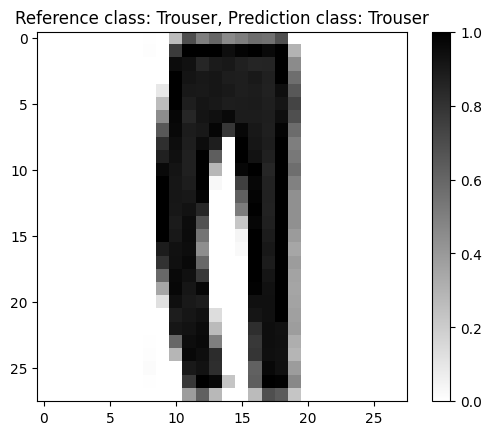

In [10]:
graph_titles = []

#Generate prediction for three samples
y_pred = model.predict(x_test[:3])
y_pred_class = np.argmax(y_pred, axis = 1)
for i in range(0,3):
  pred_class = class_names[y_pred_class[i]]
  index = np.where(y_test[i] == 1.)[0][0]
  ref_class_name = class_names[index]
  graph_titles.append("Reference class: " + str(ref_class_name) + ", Prediction class: " + str(pred_class))

for i in range (0,3):
  plt.title(graph_titles[i])
  image_df = x_test.iloc[i]
  image_plot = image_df.values.reshape(28,28)
  plt.imshow(image_plot, cmap = plt.get_cmap('gray_r'))
  plt.colorbar()
  plt.grid(False)
  plt.show()

## 8. Testing with new image
Test the model with another image (from internet or take a photo with your phone). Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$. 

Comment the results.

1/1 [==============================] - 0s 70ms/step
[[1.3065466e-08 1.8133963e-12 2.9142866e-10 1.3070541e-17 2.3394917e-12
  1.1315242e-16 5.4115884e-04 1.5060508e-19 9.9945885e-01 9.9033896e-16]]
Predictions' class #8:  Bag


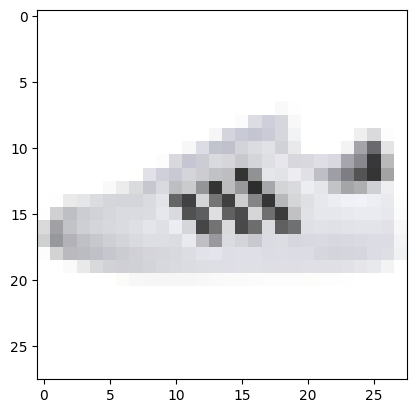

In [11]:
#For when uploading the image from a folder
#file = r'/content/schuh_adidas.jpg'
#test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#I used google colab and therefore uploaded the image from my google Drive
load_img = Image.open('/content/drive/MyDrive/schuh_adidas.jpg')

# Preview sample image
plt.imshow(load_img, cmap='gray')

#For when uploading the image from a folder
#resized_img = cv2.resize(load_img, (28, 28), interpolation=cv2.INTER_LINEAR)
#resized_img = cv2.bitwise_not(new_img)

resized_img = load_img.resize((28, 28))
resized_img.show()

plt.imshow(resized_img, cmap='gray')
img = np.array(resized_img)

img = img[:,:,0]
img_p = img.reshape(1,28*28)
img_p = img_p.astype('float32')
img_p = img_p / 255

pred_proba = model.predict(img_p)
print(pred_proba)
pred = np.argmax(pred_proba, axis=1)
scalar_pred = pred.item()
print("Predictions' class #" + str(scalar_pred)+ ": ", class_names[scalar_pred])
#print("Predictions' class #" + str(i) + ": ", pred_class)

## 9. How could we improve the trained model?

1. Try different optimizers, i.e. RMS, Adadelta, etc.
2. Try a different Cost function, i.e. MSE
3. Using a learning rate, with an optimizer through keras, and ajusting the learning rate according to the obtained results